In [ ]:
import numpy as np 
import pandas as pd 
from numpy.linalg import eig
import datetime
import matplotlib.pyplot as plt

# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

In [ ]:
import os
# cwd=os.getcwd()
# print(cwd)
os.listdir('/kaggle/input')


In [ ]:
hashtag_trump = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv",engine ="python")
hashtag_biden = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv",engine ="python")
biden_tweets = pd.read_csv("/kaggle/input/individual-tweets/tweets_of_joe_biden.csv",engine ="python")
trump_tweets = pd.read_json("/kaggle/input/trump-tweets/trump-tweets.json")



# Data Wrangling 

In [ ]:
trump= trump_tweets.copy()


In [ ]:
trump_deleted = pd.read_json("/kaggle/input/trump-tweets/trump_deleted.json")
trump_deleted
status = list()
id_deleted = list(trump_deleted['id'])
print(id_deleted)
for ids in trump['id']:
    if(ids in id_deleted):
        status.insert(ids,"Deleted")
    else:
        status.insert(ids,"Normal")
status
trump['status'] = status
trump


In [ ]:
#We now need to convert all the "favorites" into integers as some are integers and some strings. Pandas might automaticall do this for us
trump = trump.astype({'favorites': 'int'})
trump = trump.astype({'retweets': 'int'})
trump.info()

In [ ]:

# Here we have created a trump data set which displays all the deleted tweets. We do this by cross correlating trumps deleted tweets with the list of all his tweets
#The retweets have 0 favourites (which are basically likes) and have an RT at the front 
# To distinquish between the tweets trump deleted and the tweets deleted by twitter (restricted), we make the assumption that whenever a tweet is deleted by twitter the 
# like and retweet numbers are set to 0. We use this to distrinquish 

new_status = list()
for index,val in enumerate(trump['status']):
    list_fav = list(trump['favorites'])
    list_retweets = list(trump['retweets'])
    if(val=="Normal" and list_fav[index]==0 and list_retweets[index] == 0):
        new_status.insert(index, "Restricted")
    else:
        new_status.insert(index,val)
trump['status'] = new_status
trump[trump['status'] == "Deleted"]

            

The trump data now has a status column which says if the tweet if the tweet is "normal", "Resitrcited" or "deleted".We have also converted all the 'favorites' and the 'retweets' into integers. 

In [ ]:
trump.insert(1, 'time', pd.to_datetime(trump['date']).dt.time)
trump.insert(1, 'day', pd.to_datetime(trump['date']).dt.date)
trump = trump[trump['day']>=datetime.date(2020,10,7)]
trump

In [ ]:
#We now rename the columns of the trump to match the Biden data below
trump.rename(columns={'date': 'tweet_date', 'day': 'tweet_day', 'time': 'tweet_time', 'favorites':'tweet_like_count','id':'tweet_id', 'retweets':'tweet_retweet_count', 'text':'tweet_content'}, inplace=True)
trump.iloc[::-1].reset_index()

In [ ]:
biden_tweets

In [ ]:
print(biden_tweets.info())
biden = biden_tweets.copy()

In [ ]:
#splitting the datetime column to so it splits into two columns- Date and Time (create new column after date for time, and replace old datetime column with just date)

biden.insert(4, 'tweet_time', pd.to_datetime(biden['tweet_date']).dt.time)
biden.insert(4, 'tweet_day', pd.to_datetime(biden['tweet_date']).dt.date)
#drop the tweet_url
biden = biden.drop(columns=['tweet_url'])
biden.info()

In [ ]:
#restricting date for Joe Biden's tweets to be between Oct 07 2020 and Nov 07 2020
biden = biden[(biden['tweet_day']>=datetime.date(2020,10,7)) & (biden['tweet_day']<=datetime.date(2020,11,7))]
biden

In [ ]:
#check that the tweets came from the same account- Joe Biden
biden["username"].unique()

In [ ]:
#We now reindex the biden data set to start from 0
biden = biden.sort_values(by=['tweet_date'], ascending=True)
biden.reset_index()

In [ ]:
#Find tweets which hashtag both
hashtag_both = hashtag_trump.merge(hashtag_biden, how='inner', on='tweet_id')
#hashtag_both.shape

In [ ]:
#Remove common tweets from each dataset
hashtag_justbiden = hashtag_biden[~hashtag_biden['tweet_id'].isin(hashtag_both.tweet_id)]
hashtag_justtrump = hashtag_trump[~hashtag_trump['tweet_id'].isin(hashtag_both.tweet_id)]


In [ ]:
US = ['United States of America']

#Biden location groupping
B_US_df = hashtag_biden.loc[hashtag_biden['country'].isin(US)]
B_groupped_by_states = B_US_df.groupby('state')
B_US_df.insert(1, 'tweet_time', pd.to_datetime(B_US_df['created_at']).dt.time)
B_US_df.insert(1, 'tweet_day', pd.to_datetime(B_US_df['created_at']).dt.date)
B_US_df = B_US_df.astype({'likes': 'float'})


In [ ]:
#Trump location groupping
T_US_df = hashtag_trump.loc[hashtag_trump['country'].isin(US)]
T_groupped_by_states = T_US_df.groupby('state')

T_US_df.insert(1, 'tweet_time', pd.to_datetime(T_US_df['created_at']).dt.time)
T_US_df.insert(1, 'tweet_day', pd.to_datetime(T_US_df['created_at']).dt.date)
T_US_df = T_US_df.astype({'likes': 'float'})

#B_groupped_by_states.first()
#T_groupped_by_states.first()

#Might need to remove these depending on what do we want to do, because they are not states.
#District of Columbia? has a place in the electoral college?
#Puerto Rico
#Northern Marianna islands
# #Guam
# T_US_df['tweet_day'][0]
# T_US_df[T_US_df['likes']

# Exploration 

ValueError: The number of FixedLocator locations (30), usually from a call to set_ticks, does not match the number of ticklabels (606).

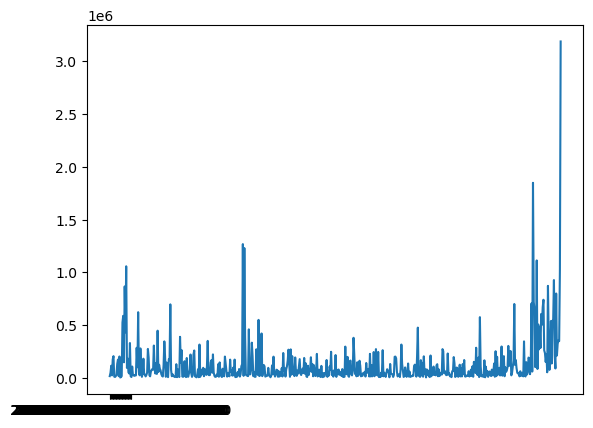

In [106]:
#test graph- by Richa :)

plt.figure(1)
plt.plot(biden["tweet_date"], biden["tweet_like_count"])
plt.xticks(range(30), biden["tweet_date"])
plt.xlabel("Date")
plt.ylabel("Likes")
plt.title("Likes for Biden Tweets")
plt.show()

# # plt.figure(2)
# # plt.plot()
# # plt.title("likes for tweets per day")
# x = [0,5,9,10,15]
# y = [0,1,2,3,4]
# fig, ax = plt.subplots()
# ax.plot(x,y)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 0.712123))
# # ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
# plt.show()

# # print(type(biden["tweet_date"]))
# # print(len(biden["tweet_like_count"]))
# biden_
# def get_daily_likecount(biden):
#     for i in biden["tweet_day"]:
#         if (i == datetime.date(2020,10,7)):
            
        
# get_daily_likecount(biden)

# #test graph- by Richa :)
# # plt.plot
# # plt.figure(1)
# # plt.plot(biden["tweet_date"], biden["tweet_like_count"])
# labels = [x for x in range(34)]
# fig, ax = plt.subplots()
# ax.plot("tweet_date","tweet_like_count", data=biden)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end,20),biden["tweet_day"])
# # plt.xticks(range(30), biden["tweet_date"])
# # ax.xaxis.set_ticks(labels)
# plt.xlabel("Date")
# # plt.ylabel("Likes")
# # plt.title("Likes for Biden Tweets")
# plt.show()

In [ ]:
candidate = list(["Biden","Trump"])
likes = list([biden['tweet_like_count'].sum(),trump['tweet_like_count'].sum()])
plt.bar(candidate, likes)
#Graph shows total number of likes for each candidate
list(biden['tweet_day'])[0]


In [ ]:
#removed the tweets with zero likes (restricted and retweeted) as these accounted only for aprx 50/1500 data points.
# We did this because we want to analyse the ratio of retweets to likes. Having 0 likes provides no information. 
biden_tweet_retweet_ratio = biden.copy()
intermediate = trump[trump['isRetweet'] == False]
trump_tweet_retweet_ratio = intermediate[intermediate["status"] != "Restricted"]


In [ ]:
#We now attempt to see about how the engagment with each candidate evolves over each time by looking at retweet to tweet like ratio
ratio_biden = list()
for i in range(len(biden_tweet_retweet_ratio['tweet_id'])):
    ratio_biden.insert(i,list(biden_tweet_retweet_ratio['tweet_retweet_count'])[i]/list(biden_tweet_retweet_ratio['tweet_like_count'])[i])
ratio_trump = list()
for i in range(len(trump_tweet_retweet_ratio['tweet_id'])):
    ratio_trump.insert(i,list(trump_tweet_retweet_ratio['tweet_retweet_count'])[i]/list(trump_tweet_retweet_ratio['tweet_like_count'])[i])

        
biden_tweet_retweet_ratio['retweet_tweet_like_ratio'] = ratio_biden
trump_tweet_retweet_ratio['retweet_tweet_like_ratio'] = ratio_trump
end = list(trump_tweet_retweet_ratio['tweet_day'])[0]
start = list(trump_tweet_retweet_ratio['tweet_day'])[-1]
increment = datetime.timedelta(days=1)
ratio_biden_average = list()
ratio_trump_average = list()
dates = trump_tweet_retweet_ratio['tweet_day'].unique()
index=0
while(start <= end):
    average_biden = biden_tweet_retweet_ratio.loc[(biden_tweet_retweet_ratio['tweet_day'] == start), 'retweet_tweet_like_ratio'].mean()
    average_trump = trump_tweet_retweet_ratio.loc[(trump_tweet_retweet_ratio['tweet_day'] == start), 'retweet_tweet_like_ratio'].mean()
    ratio_biden_average.insert(index,average_biden)
    ratio_trump_average.insert(index,average_trump)
    index+=1
    start += increment 



In [ ]:
plt.figure(2)
plt.plot(ratio_biden_average,label='Biden ratio')
plt.ylim(0, 0.3)
plt.plot(ratio_trump_average, label="Trump ratio")
plt.ylim(0, 0.3)
plt.xlabel("Days")
plt.ylabel("Ratio")
plt.title("Retweet to Like Ratio for Trump and Biden")
plt.legend()
plt.show()

In [ ]:
# Here we explore the #Trump dataset. We will look into activity of each state and compare this to known events which take place.
T_state_df = T_US_df[T_US_df['state'] == 'California'] # Change this state value to change the graphs
start = list(T_US_df['tweet_day'])[0]
end = list(T_US_df['tweet_day'])[-1]
increment = datetime.timedelta(days=1)
index = 0
number_tweets_list = list()
number_likes_list = list()
while(start<=end):
    data_for_day = T_state_df[T_state_df['tweet_day'] == start]
    if (index == 0):
        data_for_day.info()
    number_tweets = len(data_for_day)
    number_tweets_list.insert(index, number_tweets)
    number_likes_list.insert(index, data_for_day['likes'].sum())
    index+=1
    start += increment

In [ ]:
# Final US debate was on the 22nd hence the spike on the 23rd in most states. 
print(number_tweets_list.index(max(number_tweets_list)))
plt.plot(range(25),number_tweets_list)
plt.xlabel("Days") # from 15th octobre to 8th Nov
plt.ylabel("Number of Tweets")

In [ ]:
# Total number of likes related to trump day by day for a generic state
plt.plot(range(25),number_likes_list)
plt.xlabel("Days") # from 15th octobre to 8th Nov
plt.ylabel("Number of Likes")